# Vote Data Analysis from 2002 Irish General Election e-voting trial

In [58]:
#read vote data from csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 

%matplotlib inline

#input file
#constituency="DublinNorth2002"
#constituency="DublinWest2002"
constituency="Meath2002"
my_csv='../data/'+constituency+'.csv'
#my_csv ='../data/Meath2002.csv'
#my_csv ='../data/DublinNorth2002.csv'
#my_csv ='../data/DublinWest2002.csv'

#read in data (setting 1st row as header)
df = pd.read_csv(my_csv, na_values=["Missing"], header=[0])

#set column names as first line
df.head()
print("Print Data Frame (df)")
print(df)
print("Print Column names")
print(df.columns)

#drop the numbers column (#df=df.drop(['No.'], 1))
df = df.drop(df.columns[[0]], axis=1)  # df.columns is zero-based pd.Index
#reset index to start a 1 and not 0
df.index = df.index + 1

Print Data Frame (df)
         No.   FF   FG   NP  FF.1  FG.1  FG.2  NPL  NP.1  NP.2    GP   NPR  \
0          1  NaN  NaN  NaN   3.0   2.0   NaN  NaN   NaN   NaN   1.0   NaN   
1          2  NaN  2.0  NaN   NaN   3.0   NaN  1.0   NaN   NaN   NaN   NaN   
2          3  NaN  1.0  8.0   NaN   2.0   3.0  7.0   6.0   5.0   4.0   NaN   
3          4  1.0  4.0  7.0   2.0   5.0   8.0  9.0  10.0  11.0  12.0  13.0   
4          5  NaN  4.0  NaN   NaN   1.0   3.0  5.0   NaN   6.0   NaN   NaN   
...      ...  ...  ...  ...   ...   ...   ...  ...   ...   ...   ...   ...   
64076  64077  NaN  NaN  NaN   2.0   1.0   NaN  NaN   NaN   NaN   3.0   NaN   
64077  64078  NaN  3.0  7.0   NaN   1.0   4.0  2.0   8.0   6.0   NaN   NaN   
64078  64079  1.0  NaN  NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   
64079  64080  1.0  2.0  NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN   
64080  64081  2.0  NaN  NaN   NaN   NaN   1.0  NaN   NaN   NaN   NaN   NaN   

         SF  FF.2   LB  
0       NaN   Na

# Statistics on election - candidates and votes

In [59]:
#Stats No. of Candidates(columns) and Votes(rows), all combinations of candidates = candidates!
print("Statistics on Dataframe")
candidates = len(df.columns)
print("No. of Candidates = ", candidates)
votes = len(df.index)
print("No. of Votes = ", votes)
print("No. of all possible Combinations (candidates)! = ", math.factorial(candidates))

Statistics on Dataframe
No. of Candidates =  14
No. of Votes =  64081
No. of all possible Combinations (candidates)! =  87178291200


## Additional Statistics on Actual Vote Data

In [60]:
import statistics as stats
df.head()
#print(df.describe())
df.max()
# find the maximum values of each row (the highest vote preference cast)
maxValues = df.max(axis = 1)
#print(maxValues)
#mean - average 
print(f"Average(Mean) value = {stats.mean(maxValues)}")
#mode - most frequent occuring value
print(f"Mode(most often number of votes cast = {stats.mode(maxValues)}")
#median - middle value
print(f"Middle value of votes cast = {stats.median(maxValues)}")


Average(Mean) value = 4.652018539036532
Mode(most often number of votes cast = 3.0
Middle value of votes cast = 4.0


## Calculate maximum values (number of preferences) for each vote(row)

In [61]:
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)

In [62]:
mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)
print(mval.values)
print(mval.index)

[ 3184  4250 21102 12004  8347  4866  2627  1736  1053   880   425   441
   676  2490]
Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
              13.0, 14.0],
             dtype='float64')


# Plot Histogram of the number of transfers a voter casts

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0,
              13.0, 14.0],
             dtype='float64')
[ 3184  4250 21102 12004  8347  4866  2627  1736  1053   880   425   441
   676  2490]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


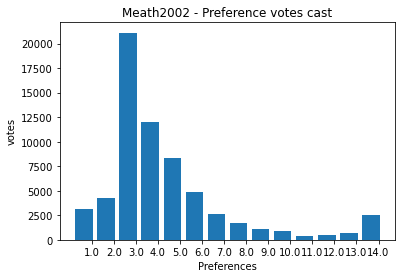

In [63]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#counts = Counter(word_list)
#labels, values = zip(*counts.items())
# sort your values in descending order
#indSort = np.argsort(values)[::-1]

# rearrange your data
labels=mval.index
values=mval.values
indexes = np.arange(len(labels))
print(labels)
print(values)
print(indexes)

bar_width = 0.35

# Add title and axis names
plt.title(constituency+' - Preference votes cast')
plt.xlabel('Preferences')
plt.ylabel('votes')

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)


# Save the histogram
plt.savefig('../images/'+constituency+'hist.png')

#show histogram
plt.show()

In [64]:
nPrList =[]
for i in range(1,candidates+1):
    nPrList.append(int(math.factorial(candidates)/(math.factorial(candidates-i))))
print(nPrList)

[14, 182, 2184, 24024, 240240, 2162160, 17297280, 121080960, 726485760, 3632428800, 14529715200, 43589145600, 87178291200, 87178291200]


## Print number of preferences cast, and calculate percentage

In [65]:
# creating the dataframe from dictionary
d={"Pref": labels, "Votes": values}    
dfpref = pd.DataFrame(d)

#calculate percentage of preferences cast and add to dataframe
votz = dfpref.Votes.sum()  
dfpref['Percentage'] = round(((dfpref['Votes']/votz)*100), 1)

#calculate possible nPr = n!/(n-r)! values for each preference vote
# candidates = n. No. of pref = r
nPrList =[]
for i in range(1,candidates+1):
    nPrList.append(int(math.factorial(candidates)/(math.factorial(candidates-i))))
#add nPr to dataframe    
dfpref['nPr'] = nPrList

# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr
0,1.0,3184,5.0,14
1,2.0,4250,6.6,182
2,3.0,21102,32.9,2184
3,4.0,12004,18.7,24024
4,5.0,8347,13.0,240240
5,6.0,4866,7.6,2162160
6,7.0,2627,4.1,17297280
7,8.0,1736,2.7,121080960
8,9.0,1053,1.6,726485760
9,10.0,880,1.4,3632428800


# Calculate number of duplicated vote sequences

In [66]:
print((~df.duplicated()).sum())
print(df.duplicated(keep='last').value_counts())

25101
True     38980
False    25101
dtype: int64


In [67]:
#drop all dublicate rows keeping last one
df.drop_duplicates(keep='last', inplace=True, subset=df.columns.difference(['maxValues']))

In [68]:
#print the number of votes, and the number of unique votes
print(f"Number of votes {votes}")
print(f"Number of unique vote patterns (after removing duplicates) {len(df)}")

Number of votes 64081
Number of unique vote patterns (after removing duplicates) 25101


In [69]:
# after removal of duplicates
#add a column of the maximum count of the rows(highest preference vote cast)
df['maxValues'] = df.max(axis = 1)

mval=(df['maxValues'].value_counts())
mval.sort_index(ascending=True, inplace=True)

### calculate unique vote combinations for each preference cast 

In [70]:
#calculate unique vote combinations for each preference cast 
dfpref['Unique Votes'] = mval.values


dfpref['Percentage Used'] = round(((dfpref['Unique Votes']/dfpref['nPr'])*100), 5)

# displaying the dataframe
display(dfpref)

,Pref,Votes,Percentage,nPr,Unique Votes,Percentage Used
0,1.0,3184,5.0,14,14,100.00000
1,2.0,4250,6.6,182,165,90.65934
2,3.0,21102,32.9,2184,1419,64.97253
3,4.0,12004,18.7,24024,3744,15.58442
4,5.0,8347,13.0,240240,5321,2.21487
5,6.0,4866,7.6,2162160,4249,0.19652
6,7.0,2627,4.1,17297280,2543,0.01470
7,8.0,1736,2.7,121080960,1703,0.00141
8,9.0,1053,1.6,726485760,1047,0.00014
9,10.0,880,1.4,3632428800,877,0.00002


In [44]:
#just checking 
print(sum(mval.values))

25101
